In [15]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from statsmodels.genmod.families.links import logit
from sklearn.inspection import permutation_importance
from sklearn.metrics import auc, roc_curve
from math import sqrt
import xgboost as xgb
from sklearn import metrics, tree
from sklearn.linear_model import LogisticRegression
from scipy.stats import ttest_ind

In [16]:
#(from data-export file)
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd

# Create your DataFrame
data = {
    'Engagement_Rate': [0.6531361711, 0.5890570157, 0.3980717924, 0.5602996735, 0.6939932526,
                        0.4832841691, 0.6116444446, 0.7073717178, 0.5346045198, 0.6469668543,
                        0.07404393816, 0.6328173453, 0.2944369064, 0.621669627, 0.02142857143,
                        0.6005291005, 0.5805555556, 0.6227106227, 0.6439393939, 0.5614973262,
                        0.3442622951, 0.525],
    'Conversions': [550, 65, 216, 142, 31, 129, 68, 42, 13, 15, 11, 0, 1, 17, 1, 4, 1, 1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Perform linear regression using formula-style approach
reg = smf.ols(formula="Conversions ~ Engagement_Rate", data=df).fit()

# View regression summary
print(reg.summary())

                            OLS Regression Results                            
Dep. Variable:            Conversions   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                 -0.026
Method:                 Least Squares   F-statistic:                    0.4700
Date:                Mon, 18 Sep 2023   Prob (F-statistic):              0.501
Time:                        09:03:50   Log-Likelihood:                -136.42
No. Observations:                  22   AIC:                             276.8
Df Residuals:                      20   BIC:                             279.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           7.0178     80.948     

In [30]:
#Analysis of the findings above: R-squared is 0.023, which indicates that only 2.3% of the variance in Conversions is explained by Engagement_Rate. This suggests that the independent variable(s) may not be a strong predictor of Conversions.
#The F-statistic tests whether there is a significant relationship between the independent variable(s) and the dependent variable.
#The F-statistic is 0.4700, and its associated p-value (Prob F-statistic) is 0.501. A high p-value suggests that there is insufficient evidence to conclude that the independent variable(s) have a significant overall effect on the dependent variable.
#Coefficients:

#Intercept: The intercept represents the estimated value of Conversions when Engagement_Rate is zero. In this case, it is 7.0178, but it's not statistically significant (p = 0.932).
#Engagement_Rate: The coefficient for Engagement_Rate is 101.0943, suggesting that, for a one-unit increase in Engagement_Rate, Conversions is estimated to increase by 101.0943. However, it's not statistically significant (p = 0.501), indicating that the relationship between Engagement_Rate and Conversions is not strong.

In [24]:
#The regression results provide information about the relationship between "Engagement_Rate" and "Conversions."

#R-squared: The R-squared value is 0.023, which indicates that only a small proportion (2.3%) of the variance in "Conversions" can be explained by "Engagement_Rate." This suggests that "Engagement_Rate" is not a strong predictor of "Conversions."

#Coefficients:

#Intercept: The intercept is 7.0178. In this context, it represents the estimated value of "Conversions" when "Engagement_Rate" is zero. However, this interpretation may not be meaningful, as "Engagement_Rate" is not likely to be zero in your data.
#Engagement_Rate: The coefficient for "Engagement_Rate" is 101.0943. It indicates the change in the estimated "Conversions" for a one-unit change in "Engagement_Rate." However, the p-value for this coefficient is 0.501, which is greater than the typical significance level of 0.05. This suggests that "Engagement_Rate" is not statistically significant in predicting "Conversions."
#F-statistic: The F-statistic tests whether the overall model (including all predictors) is statistically significant. In this case, the F-statistic is 0.4700, and the associated p-value is 0.501. Since the p-value is greater than 0.05, it implies that the model as a whole is not statistically significant in predicting "Conversions."

#Adjusted R-squared: The adjusted R-squared adjusts the R-squared value for the number of predictors in the model. It's -0.026 in this case, indicating that adding "Engagement_Rate" to the model doesn't improve its explanatory power.

#Prob (F-statistic): This is the probability associated with the F-statistic. A high p-value (0.501) suggests that the model doesn't explain much of the variation in "Conversions."

#Residuals: Other statistics like the Omnibus, Durbin-Watson, Jarque-Bera, skewness, kurtosis, and conditional number are related to the goodness-of-fit and assumptions of the regression model. The high Omnibus and Jarque-Bera p-values indicate that the residuals may not be normally distributed, and the model may not meet certain assumptions.

#In summary, the regression results suggest that "Engagement_Rate" does not appear to be a significant predictor of "Conversions" in your dataset. The model does not explain much of the variation in "Conversions," as indicated by the low R-squared and the non-significant coefficients and F-statistic. Additional factors or variables may be needed to better predict "Conversions."

In [18]:
#from Session default channel group and Operating System data
# Create a DataFrame from your data (
data = {
    'Engaged sessions per user': [0.7077537806, 0.8723220842, 0.4421541846, 0.8318037337, 0.5196905276, 1.132783883, 1.082942239, 1.008205605, 0.4934439834, 1.091603919, 1.088959565, 1.037405334, 0.9341698004, 0.5850202429, 1.043448512, 0.7645965043, 0.8305084746, 0.8179669031, 0.1040462428, 0.963099631, 1.102912621, 1.025052192, 1.059016393, 0.007117437722, 0.003623188406, 0.0153256705, 1.008810573, 0.9301075269, 0.9393939394, 0.006493506494, 0, 0.5111111111, 0.3255813953, 0.3076923077],
    'Engagement rate': [0.5647662084, 0.6323466906, 0.3792641733, 0.531221409, 0.4392082941, 0.7321193033, 0.729424997, 0.7061374973, 0.4576662562, 0.6527187721, 0.6629217894, 0.6904824236, 0.5726270238, 0.5208547889, 0.7121176745, 0.644716212, 0.6492113565, 0.4937214612, 0.09708737864, 0.6549560853, 0.7108886108, 0.5722610723, 0.6757322176, 0.006349206349, 0.006578947368, 0.03389830508, 0.7762711864, 0.6865079365, 0.6224899598, 0.1428571429, 0, 0.4693877551, 0.3181818182, 0.3076923077],
}

df = pd.DataFrame(data)

# Basic statistics
basic_stats = df.describe()
basic_stats

,Engaged sessions per user,Engagement rate
count,34.000000,34.000000
mean,0.693946,0.495667
std,0.389931,0.241033
min,0.000000,0.000000
25%,0.454977,0.394250
50%,0.831156,0.572444
75%,1.020992,0.672530
max,1.132784,0.776271


array([[<AxesSubplot: title={'center': 'Engaged sessions per user'}>,
        <AxesSubplot: title={'center': 'Engagement rate'}>]], dtype=object)

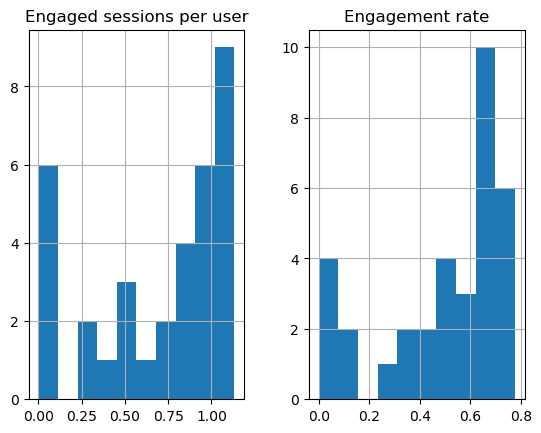

In [19]:
df.hist()

In [20]:
# Correlation matrix
correlation_matrix = df.corr()
correlation_matrix

,Engaged sessions per user,Engagement rate
Engaged sessions per user,1.00000,0.96531
Engagement rate,0.96531,1.00000


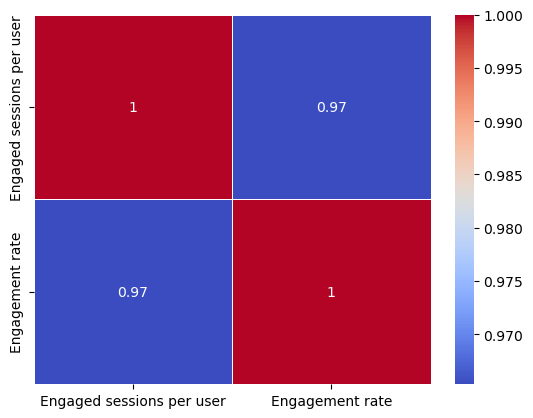

In [21]:
# Plotting
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.show()

In [22]:
# Create your DataFrame
data = {
    'Engagement_Rate': [0.6531361711, 0.5890570157, 0.3980717924, 0.5602996735, 0.6939932526,
                        0.4832841691, 0.6116444446, 0.7073717178, 0.5346045198, 0.6469668543,
                        0.07404393816, 0.6328173453, 0.2944369064, 0.621669627, 0.02142857143,
                        0.6005291005, 0.5805555556, 0.6227106227, 0.6439393939, 0.5614973262,
                        0.3442622951, 0.525],
    'Conversions': [550, 65, 216, 142, 31, 129, 68, 42, 13, 15, 11, 0, 1, 17, 1, 4, 1, 1, 0, 0, 0, 0]
}

df = pd.DataFrame(data)

# Separate data into two groups
group1 = df[df['Conversions'] > 0]['Engagement_Rate']  # Group with Conversions > 0
group2 = df[df['Conversions'] == 0]['Engagement_Rate']  # Group with Conversions = 0

# Perform a t-test to compare the mean 'Engagement_Rate' between the two groups
t_statistic, p_value = ttest_ind(group1, group2, equal_var=False)

# Define the significance level (alpha)
alpha = 0.05

# Print the results
print("T-Statistic:", t_statistic)
print("P-Value:", p_value)

# Check if the p-value is less than alpha to determine statistical significance
if p_value < alpha:
    print("Null hypothesis rejected: There is a significant difference in mean 'Engagement_Rate' between the two groups.")
else:
    print("Null hypothesis not rejected: There is no significant difference in mean 'Engagement_Rate' between the two groups.")

T-Statistic: -0.4118859992993967
P-Value: 0.688048700938926
Null hypothesis not rejected: There is no significant difference in mean 'Engagement_Rate' between the two groups.


In [26]:
#Based on the results of the t-test and the statement "Null hypothesis not rejected," it suggests that, in the context of the data and analysis performed, there is not enough evidence to conclude that engagement rate has a statistically significant impact on conversions.
#In other words, the t-test did not find a significant difference in mean 'Engagement_Rate' between the group with Conversions > 0 and the group with Conversions = 0. This means that, a high engagement rate does not necessarily correspond to high conversions.
#But statistical significance doesn't definitely imply practical or real-world significance. It's possible that other factors not included in this analysis could influence conversions.